This notebook aims to compare the effect of different color spaces on image classification. Here, 

* RGB
* LUV
* LAB
* HSV
* YUV
* YCrCb and 
* HLS 

were compared. 

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os
import zipfile
import matplotlib.pyplot as plt
tf.keras.utils.set_random_seed(42) 
tf.config.experimental.enable_op_determinism()

Resnet50 = tf.keras.applications.ResNet50(include_top=False, weights='imagenet',
                                           input_shape=(150,150,3),classes=75)
Resnet50.trainable = True
initializer = tf.keras.initializers.GlorotUniform(seed=42)


94781440/94765736 [==============================] - 2s 0us/step


## Load Data

In [2]:
# Replace the following with your secrets
os.environ['KAGGLE_USERNAME'] =  'oluwaseunilori'
os.environ['KAGGLE_KEY'] = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
import kaggle
!kaggle datasets download -d gpiosenka/butterfly-images40-species -p DATA_DIR

train_dir = "/content/train/"
test_dir ='/content/test'
val_dir = '/content/valid/'

 99% 362M/365M [00:08<00:00, 45.7MB/s]
100% 365M/365M [00:08<00:00, 43.9MB/s]


In [3]:
!unzip -q /content/DATA_DIR/butterfly-images40-species.zip

## RGB

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


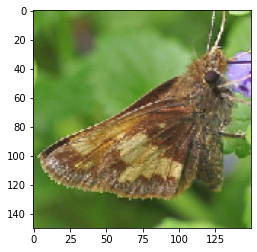

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)


plt.imshow(train_generator[1][0][0])

In [5]:
model = tf.keras.models.Sequential([
    Resnet50,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='softmax')
])

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n // validation_generator.batch_size

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb_history = model.fit(x = train_generator,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = validation_generator,
          validation_steps = STEP_SIZE_VALID,
          epochs = 5)


rgb_test = model.evaluate(test_generator)
print(rgb_test)

Epoch 1/5
290/290 [==============================] - 193s 581ms/step - loss: 1.1873 - acc: 0.7390 - val_loss: 5.0396 - val_acc: 0.0114
Epoch 2/5
290/290 [==============================] - 166s 572ms/step - loss: 0.1486 - acc: 0.9628 - val_loss: 4.5231 - val_acc: 0.1648
Epoch 3/5
290/290 [==============================] - 166s 572ms/step - loss: 0.1113 - acc: 0.9808 - val_loss: 120.4804 - val_acc: 0.1307
Epoch 4/5
290/290 [==============================] - 166s 571ms/step - loss: 0.1016 - acc: 0.9829 - val_loss: 202.8203 - val_acc: 0.0568
Epoch 5/5
12/12 [==============================] - 3s 263ms/step - loss: 28.8916 - acc: 0.4480
[28.891582489013672, 0.4480000138282776]


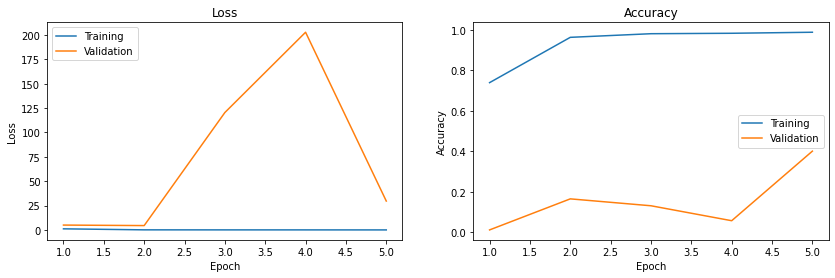

In [6]:
history = rgb_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 LUV

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


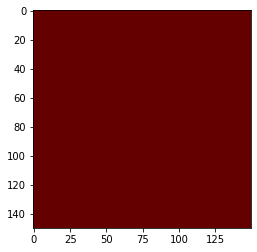

In [7]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
    return image

train_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img,
)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
test_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

plt.imshow(train_generator[1][0][0])

In [8]:

rgb2luv_model = tf.keras.models.Sequential([
    Resnet50,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='softmax')
])

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n // validation_generator.batch_size

rgb2luv_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2luv_history = rgb2luv_model.fit(x = train_generator,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = validation_generator,
          validation_steps = STEP_SIZE_VALID,
          epochs = 5)

luv_test = rgb2luv_model.evaluate(test_generator)
print(luv_test)

Epoch 1/5
290/290 [==============================] - 185s 593ms/step - loss: 4.2334 - acc: 0.1331 - val_loss: 3.7903 - val_acc: 0.1705
Epoch 2/5
290/290 [==============================] - 171s 589ms/step - loss: 2.1095 - acc: 0.4843 - val_loss: 3.7415 - val_acc: 0.2812
Epoch 3/5
290/290 [==============================] - 171s 588ms/step - loss: 0.8795 - acc: 0.7813 - val_loss: 3.4165 - val_acc: 0.3210
Epoch 4/5
290/290 [==============================] - 171s 589ms/step - loss: 0.4319 - acc: 0.8970 - val_loss: 10.7365 - val_acc: 0.1818
Epoch 5/5
12/12 [==============================] - 3s 211ms/step - loss: 11.4028 - acc: 0.1653
[11.402782440185547, 0.1653333306312561]


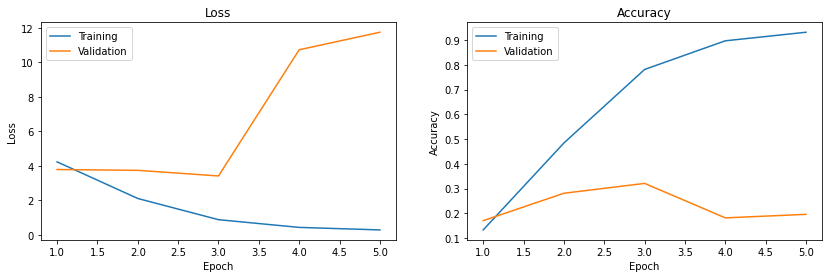

In [9]:
history = rgb2luv_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 LAB

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


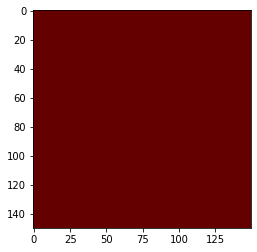

In [10]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    return image
train_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img,
)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)

validation_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

test_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

plt.imshow(train_generator[1][0][0])

In [11]:


Resnet50 = tf.keras.applications.ResNet50(include_top=False, weights='imagenet',
                                           input_shape=(150,150,3),classes=75)
Resnet50.trainable = True
rgb2lab_model = tf.keras.models.Sequential([
    Resnet50,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='softmax')
])

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n // validation_generator.batch_size

rgb2lab_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2lab_history = rgb2lab_model.fit(x = train_generator,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = validation_generator,
          validation_steps = STEP_SIZE_VALID,
          epochs = 5)


lab_test=rgb2lab_model.evaluate(test_generator)
print(lab_test)

Epoch 1/5
290/290 [==============================] - 184s 590ms/step - loss: 4.1857 - acc: 0.1173 - val_loss: 4.4273 - val_acc: 0.0142
Epoch 2/5
290/290 [==============================] - 170s 587ms/step - loss: 2.2789 - acc: 0.4350 - val_loss: 4.3869 - val_acc: 0.0114
Epoch 3/5
290/290 [==============================] - 171s 588ms/step - loss: 0.9818 - acc: 0.7487 - val_loss: 4.4389 - val_acc: 0.0511
Epoch 4/5
290/290 [==============================] - 170s 586ms/step - loss: 0.4822 - acc: 0.8810 - val_loss: 8.3354 - val_acc: 0.0852
Epoch 5/5
12/12 [==============================] - 3s 208ms/step - loss: 7.6893 - acc: 0.1973
[7.6892619132995605, 0.19733333587646484]


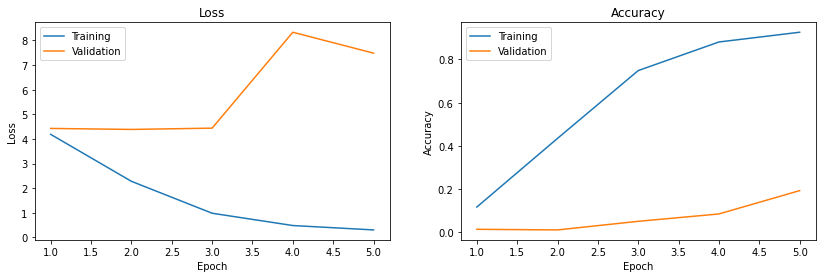

In [12]:
history = rgb2lab_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 HSV

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


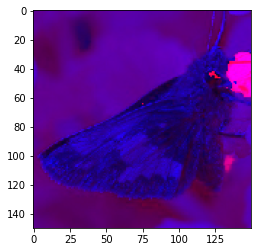

In [13]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    return image
train_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img,
)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
test_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
plt.imshow(train_generator[1][0][0])

In [14]:
rgb2hsv_model = tf.keras.models.Sequential([
    Resnet50,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='softmax')
])

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n // validation_generator.batch_size

rgb2hsv_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2hsv_history = rgb2hsv_model.fit(x = train_generator,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = validation_generator,
          validation_steps = STEP_SIZE_VALID,
          epochs = 5)


hsv_test = rgb2hsv_model.evaluate(test_generator)
print(hsv_test)

Epoch 1/5
290/290 [==============================] - 182s 584ms/step - loss: 1.3930 - acc: 0.6573 - val_loss: 0.9737 - val_acc: 0.7869
Epoch 2/5
290/290 [==============================] - 169s 582ms/step - loss: 0.0978 - acc: 0.9737 - val_loss: 4.6064 - val_acc: 0.6619
Epoch 3/5
290/290 [==============================] - 168s 581ms/step - loss: 0.0573 - acc: 0.9866 - val_loss: 15.4499 - val_acc: 0.4489
Epoch 4/5
290/290 [==============================] - 169s 582ms/step - loss: 0.0475 - acc: 0.9902 - val_loss: 31.4981 - val_acc: 0.1903
Epoch 5/5
12/12 [==============================] - 3s 206ms/step - loss: 30.9035 - acc: 0.2773
[30.903520584106445, 0.2773333191871643]


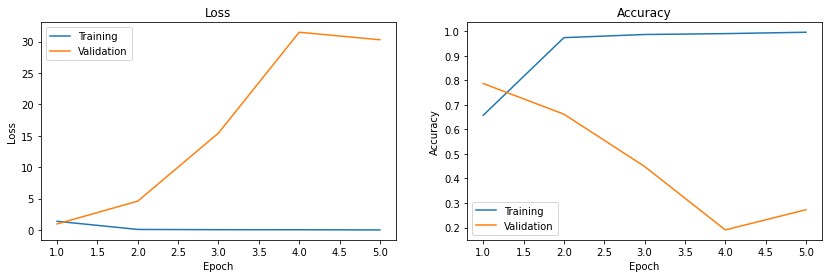

In [15]:
history = rgb2hsv_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 YUV

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


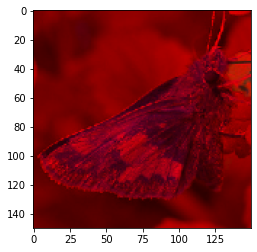

In [16]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    return image
train_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img,
)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
test_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
plt.imshow(train_generator[1][0][0])

In [17]:
rgb2yuv_model = tf.keras.models.Sequential([
    Resnet50,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='softmax')
])

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n // validation_generator.batch_size

rgb2yuv_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2yuv_history = rgb2yuv_model.fit(x = train_generator,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = validation_generator,
          validation_steps = STEP_SIZE_VALID,
          epochs = 5)

yuv_test = rgb2yuv_model.evaluate(test_generator)
print(yuv_test)

Epoch 1/5
290/290 [==============================] - 183s 585ms/step - loss: 1.0043 - acc: 0.7440 - val_loss: 0.6819 - val_acc: 0.8722
Epoch 2/5
290/290 [==============================] - 168s 580ms/step - loss: 0.0713 - acc: 0.9798 - val_loss: 1.1531 - val_acc: 0.8551
Epoch 3/5
290/290 [==============================] - 168s 580ms/step - loss: 0.0327 - acc: 0.9919 - val_loss: 23.6237 - val_acc: 0.4659
Epoch 4/5
290/290 [==============================] - 168s 581ms/step - loss: 0.0366 - acc: 0.9931 - val_loss: 5.1582 - val_acc: 0.7330
Epoch 5/5
12/12 [==============================] - 2s 190ms/step - loss: 3.7548 - acc: 0.7787
[3.7547991275787354, 0.7786666750907898]


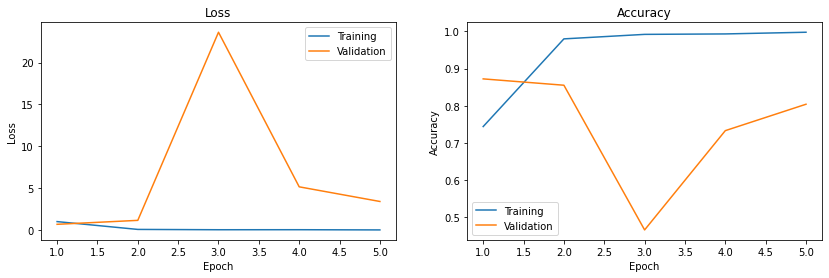

In [18]:
history = rgb2yuv_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 YCrCb

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


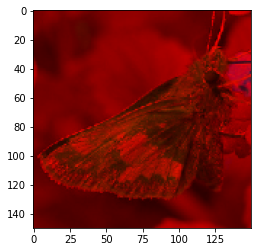

In [19]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    return image
train_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img,
)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
test_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

plt.imshow(train_generator[1][0][0])

In [20]:
rgb2ycrcb_model = tf.keras.models.Sequential([
    Resnet50,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='softmax')
])

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n // validation_generator.batch_size

rgb2ycrcb_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2ycrcb_history = rgb2ycrcb_model.fit(x = train_generator,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = validation_generator,
          validation_steps = STEP_SIZE_VALID,
          epochs = 5)

ycrcb_test = rgb2ycrcb_model.evaluate(test_generator)
print(ycrcb_test)

Epoch 1/5
290/290 [==============================] - 182s 583ms/step - loss: 0.8471 - acc: 0.7873 - val_loss: 0.4288 - val_acc: 0.8977
Epoch 2/5
290/290 [==============================] - 168s 579ms/step - loss: 0.0501 - acc: 0.9863 - val_loss: 0.8650 - val_acc: 0.8693
Epoch 3/5
290/290 [==============================] - 168s 579ms/step - loss: 0.0218 - acc: 0.9934 - val_loss: 0.5944 - val_acc: 0.9148
Epoch 4/5
290/290 [==============================] - 168s 579ms/step - loss: 0.0161 - acc: 0.9965 - val_loss: 18.0334 - val_acc: 0.5085
Epoch 5/5
12/12 [==============================] - 2s 191ms/step - loss: 3.7074 - acc: 0.7227
[3.707395076751709, 0.7226666808128357]


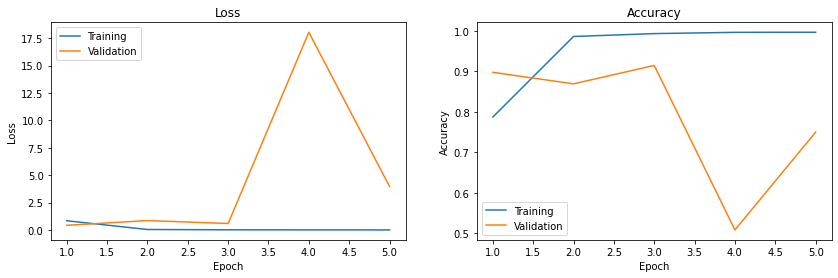

In [21]:
history = rgb2ycrcb_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()


## RGB 2 HLS

Found 9285 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Found 375 images belonging to 75 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


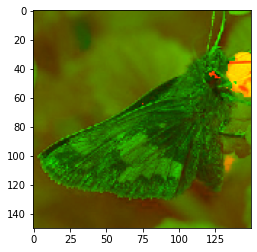

In [22]:
tf.keras.backend.clear_session()
def conv_img(image):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    return image
train_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img,
)
train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   seed=42)


validation_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)
test_datagen = ImageDataGenerator(rescale=1./255,
                                  preprocessing_function=conv_img)
test_generator = test_datagen.flow_from_directory(test_dir,
                                  target_size=(150,150),
                                  batch_size=32,
                                  seed=42)

plt.imshow(train_generator[1][0][0])

In [23]:
rgb2hls_model = tf.keras.models.Sequential([
    Resnet50,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(75,kernel_initializer=initializer, activation='softmax')
])

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n // validation_generator.batch_size

rgb2hls_model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])
rgb2hls_history = rgb2hls_model.fit(x = train_generator,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = validation_generator,
          validation_steps = STEP_SIZE_VALID,
          epochs = 5)



hls_test = rgb2hls_model.evaluate(test_generator)
print(hls_test)

Epoch 1/5
290/290 [==============================] - 178s 567ms/step - loss: nan - acc: 0.0136 - val_loss: nan - val_acc: 0.0142
Epoch 2/5
290/290 [==============================] - 163s 561ms/step - loss: nan - acc: 0.0136 - val_loss: nan - val_acc: 0.0142
Epoch 3/5
290/290 [==============================] - 163s 560ms/step - loss: nan - acc: 0.0135 - val_loss: nan - val_acc: 0.0142
Epoch 4/5
290/290 [==============================] - 163s 560ms/step - loss: nan - acc: 0.0136 - val_loss: nan - val_acc: 0.0142
Epoch 5/5
12/12 [==============================] - 2s 188ms/step - loss: nan - acc: 0.0133
[nan, 0.013333333656191826]


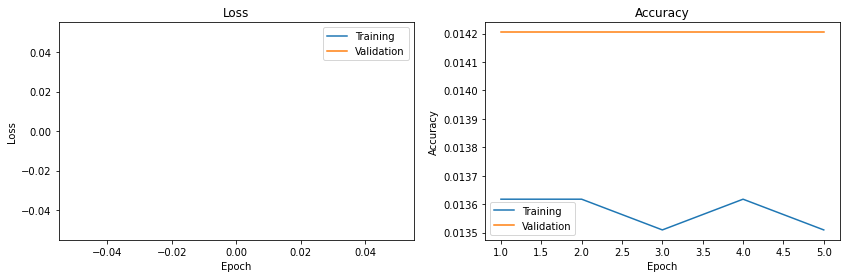

In [24]:
history = rgb2hls_history.history
n_epochs = len(history['loss'])

plt.figure(figsize=[14,4])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1), history['loss'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_loss'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, n_epochs+1), history['acc'], label='Training')
plt.plot(range(1, n_epochs+1), history['val_acc'], label='Validation')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
plt.legend()
plt.show()

## Results

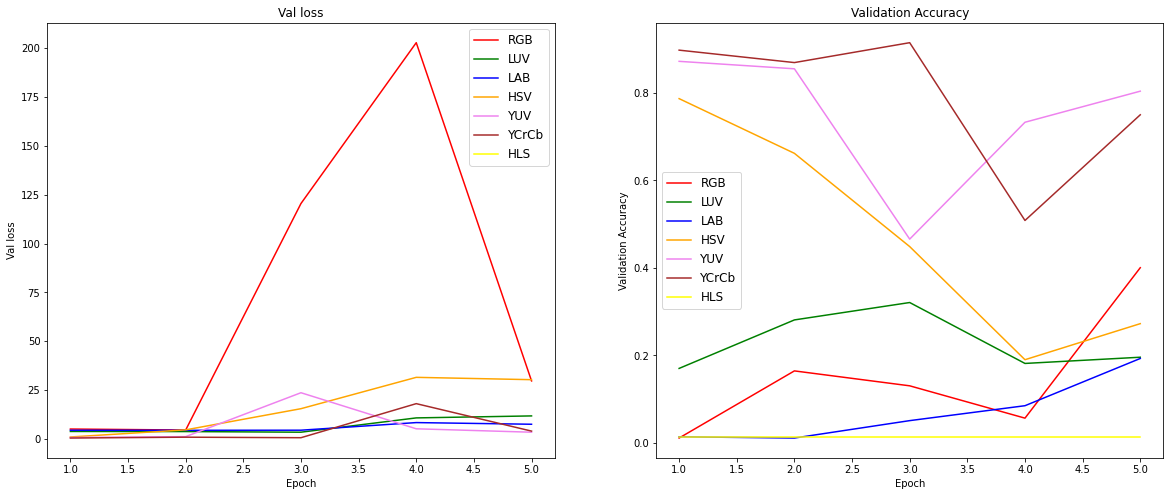

In [25]:
plot_rgb_history = rgb_history.history
plot_rgb2luv_history = rgb2luv_history.history
plot_rgb2lab_history = rgb2lab_history.history
plot_rgb2hsvhistory = rgb2hsv_history.history
plot_rgb2yuv_history = rgb2yuv_history.history
plot_rgb2ycrcb_history = rgb2ycrcb_history.history
plot_rgb2hls_history = rgb2hls_history.history

n_epochs = len(history['loss'])

plt.figure(figsize=[20,8])
plt.subplot(1,2,1)
plt.plot(range(1, n_epochs+1),plot_rgb_history['val_loss'], label='RGB',color='red')
plt.plot(range(1, n_epochs+1),plot_rgb2luv_history['val_loss'], label='LUV',color='Green')
plt.plot(range(1, n_epochs+1),plot_rgb2lab_history['val_loss'], label='LAB',color='blue')
plt.plot(range(1, n_epochs+1),plot_rgb2hsvhistory['val_loss'], label='HSV',color='orange')
plt.plot(range(1, n_epochs+1),plot_rgb2yuv_history['val_loss'], label='YUV',color='violet')
plt.plot(range(1, n_epochs+1),plot_rgb2ycrcb_history['val_loss'], label='YCrCb',color='brown')
plt.plot(range(1, n_epochs+1),plot_rgb2hls_history['val_loss'], label='HLS',color='yellow')
plt.xlabel('Epoch'); plt.ylabel('Val loss'); plt.title('Val loss')
plt.legend(fontsize=12)
plt.subplot(1,2,2)



plt.plot(range(1, n_epochs+1),plot_rgb_history['val_acc'], label='RGB',color='Red')
plt.plot(range(1, n_epochs+1),plot_rgb2luv_history['val_acc'], label='LUV',color='Green')
plt.plot(range(1, n_epochs+1),plot_rgb2lab_history['val_acc'], label='LAB',color='Blue')
plt.plot(range(1, n_epochs+1),plot_rgb2hsvhistory['val_acc'], label='HSV',color='orange')
plt.plot(range(1, n_epochs+1),plot_rgb2yuv_history['val_acc'], label='YUV',color='violet')
plt.plot(range(1, n_epochs+1),plot_rgb2ycrcb_history['val_acc'], label='YCrCb',color='brown')
plt.plot(range(1, n_epochs+1),plot_rgb2hls_history['val_acc'], label='HLS',color='yellow')
plt.xlabel('Epoch'); plt.ylabel('Validation Accuracy'); plt.title('Validation Accuracy')
plt.legend(fontsize=12)
plt.show()
